In [11]:
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
todays_csv_name = "speed_test_monitor_%s.csv" % datetime.datetime.strftime(datetime.datetime.now(), "%d_%m_%Y")
speed_tests_df = pd.read_csv(todays_csv_name)

# Set types
speed_tests_df["Download"].astype(np.float16)
speed_tests_df["Upload"].astype(np.float16)
del speed_tests_df["Share"]

# Data cleanup
speed_tests_df['Download (Megabits)'] = speed_tests_df['Download'] / 10**6
speed_tests_df['Upload (Megabits)'] = speed_tests_df['Upload'] / 10**6
speed_tests_df["Timestamp"] = pd.to_datetime(speed_tests_df["Timestamp"])
speed_tests_df = speed_tests_df.set_index("Timestamp")
speed_tests_df.sort_index()

,Server ID,Sponsor,Server Name,Distance,Ping,Download,Upload,IP Address,Download (Megabits),Upload (Megabits)
Timestamp,,,,,,,,,,
2021-06-26 10:37:56.936590,30690,Community Fibre Limited,London,2.56029,18.517,1.186347e+08,4.112027e+07,185.69.145.146,118.634709,41.120266


In [13]:
speed_tests_df.head()

,Server ID,Sponsor,Server Name,Distance,Ping,Download,Upload,IP Address,Download (Megabits),Upload (Megabits)
Timestamp,,,,,,,,,,
2021-06-26 10:37:56.936590,30690,Community Fibre Limited,London,2.56029,18.517,1.186347e+08,4.112027e+07,185.69.145.146,118.634709,41.120266


In [14]:
speed_tests_df.tail()

,Server ID,Sponsor,Server Name,Distance,Ping,Download,Upload,IP Address,Download (Megabits),Upload (Megabits)
Timestamp,,,,,,,,,,
2021-06-26 10:37:56.936590,30690,Community Fibre Limited,London,2.56029,18.517,1.186347e+08,4.112027e+07,185.69.145.146,118.634709,41.120266


In [15]:
now = datetime.datetime.now()
today_as_str = datetime.datetime.strftime(now, "%d-%m-%Y")
#start = now - datetime.timedelta(hours=24)
#end = now + datetime.timedelta(hours=2)

start = speed_tests_df.index[0]
end = speed_tests_df.index[-1]

/Users/vvzen/miniconda3/envs/hacks3/lib/python3.5/site-packages/ipykernel_launcher.py:11: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=737967.4430200994, right=737967.4430200994
  # This is added back by InteractiveShellApp.init_path()


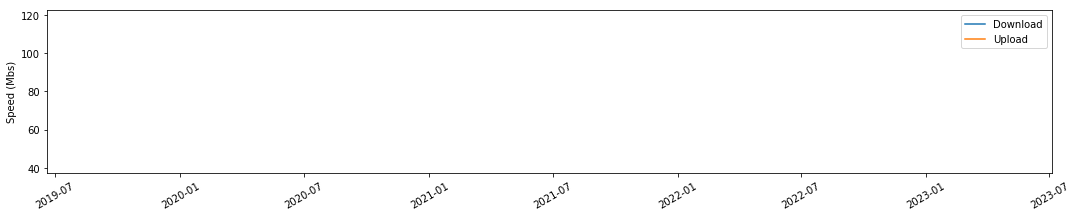

In [16]:
fig, ax = plt.subplots()
plt.plot(speed_tests_df["Download (Megabits)"])
plt.plot(speed_tests_df["Upload (Megabits)"])

plt.rcParams["figure.figsize"] = (18,3)
plt.xticks(rotation=30)

ax.legend(["Download", "Upload"])

ax.set_ylabel("Speed (Mbs)")
ax.set_xlim(start, end)

img_name = "upload_download_speed_{0}.jpg".format(today_as_str)
plt.savefig(img_name)

plt.show()

/Users/vvzen/miniconda3/envs/hacks3/lib/python3.5/site-packages/ipykernel_launcher.py:10: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=737967.4430200994, right=737967.4430200994
  # Remove the CWD from sys.path while we load stuff.


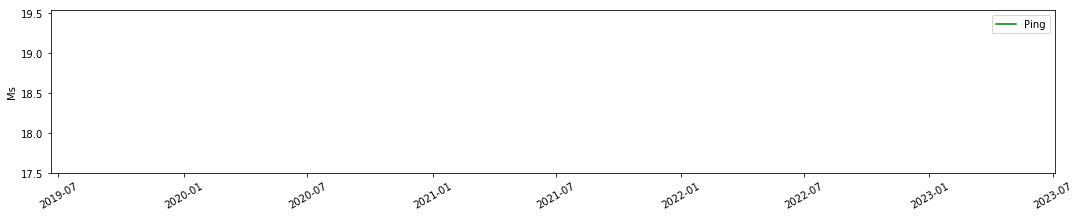

In [17]:
fig, ax = plt.subplots()
plt.plot(speed_tests_df["Ping"], color="g")

plt.rcParams["figure.figsize"] = (18,3)
plt.xticks(rotation=30)

ax.legend(["Ping"])

ax.set_ylabel("Ms")
ax.set_xlim(start, end)

img_name = "ping_latency_{0}.jpg".format(today_as_str)
plt.savefig(img_name)

plt.show()